In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('D:\CSUN\COMP542\Dataset\phishing.csv')

In [2]:
data

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [3]:
data.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [4]:
#make a table of names of columns
data.columns


Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#show class distribution
data['class'].value_counts()

class
 1    6157
-1    4897
Name: count, dtype: int64

In [6]:
data.drop(['Index'], axis=1, inplace=True)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirecting//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  InfoEmail            1

In [8]:
X = data.drop('class', axis=1)
y = data['class']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


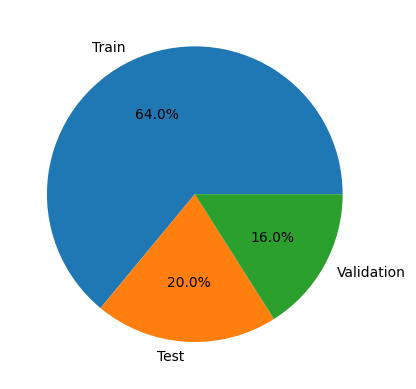

In [10]:
#show train, test and validation split from original data in pie chart LIKE 60% train, 20% test and 20% validation
sizes = [len(X_train), len(X_test), len(X_val)]
labels = ['Train', 'Test', 'Validation']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()



In [11]:
#show number of records in each class in train, test and validation data
train_class = y_train.value_counts()
test_class = y_test.value_counts()
val_class = y_val.value_counts()
train_class, test_class, val_class  

(class
  1    3963
 -1    3111
 Name: count, dtype: int64,
 class
  1    1235
 -1     976
 Name: count, dtype: int64,
 class
  1    959
 -1    810
 Name: count, dtype: int64)

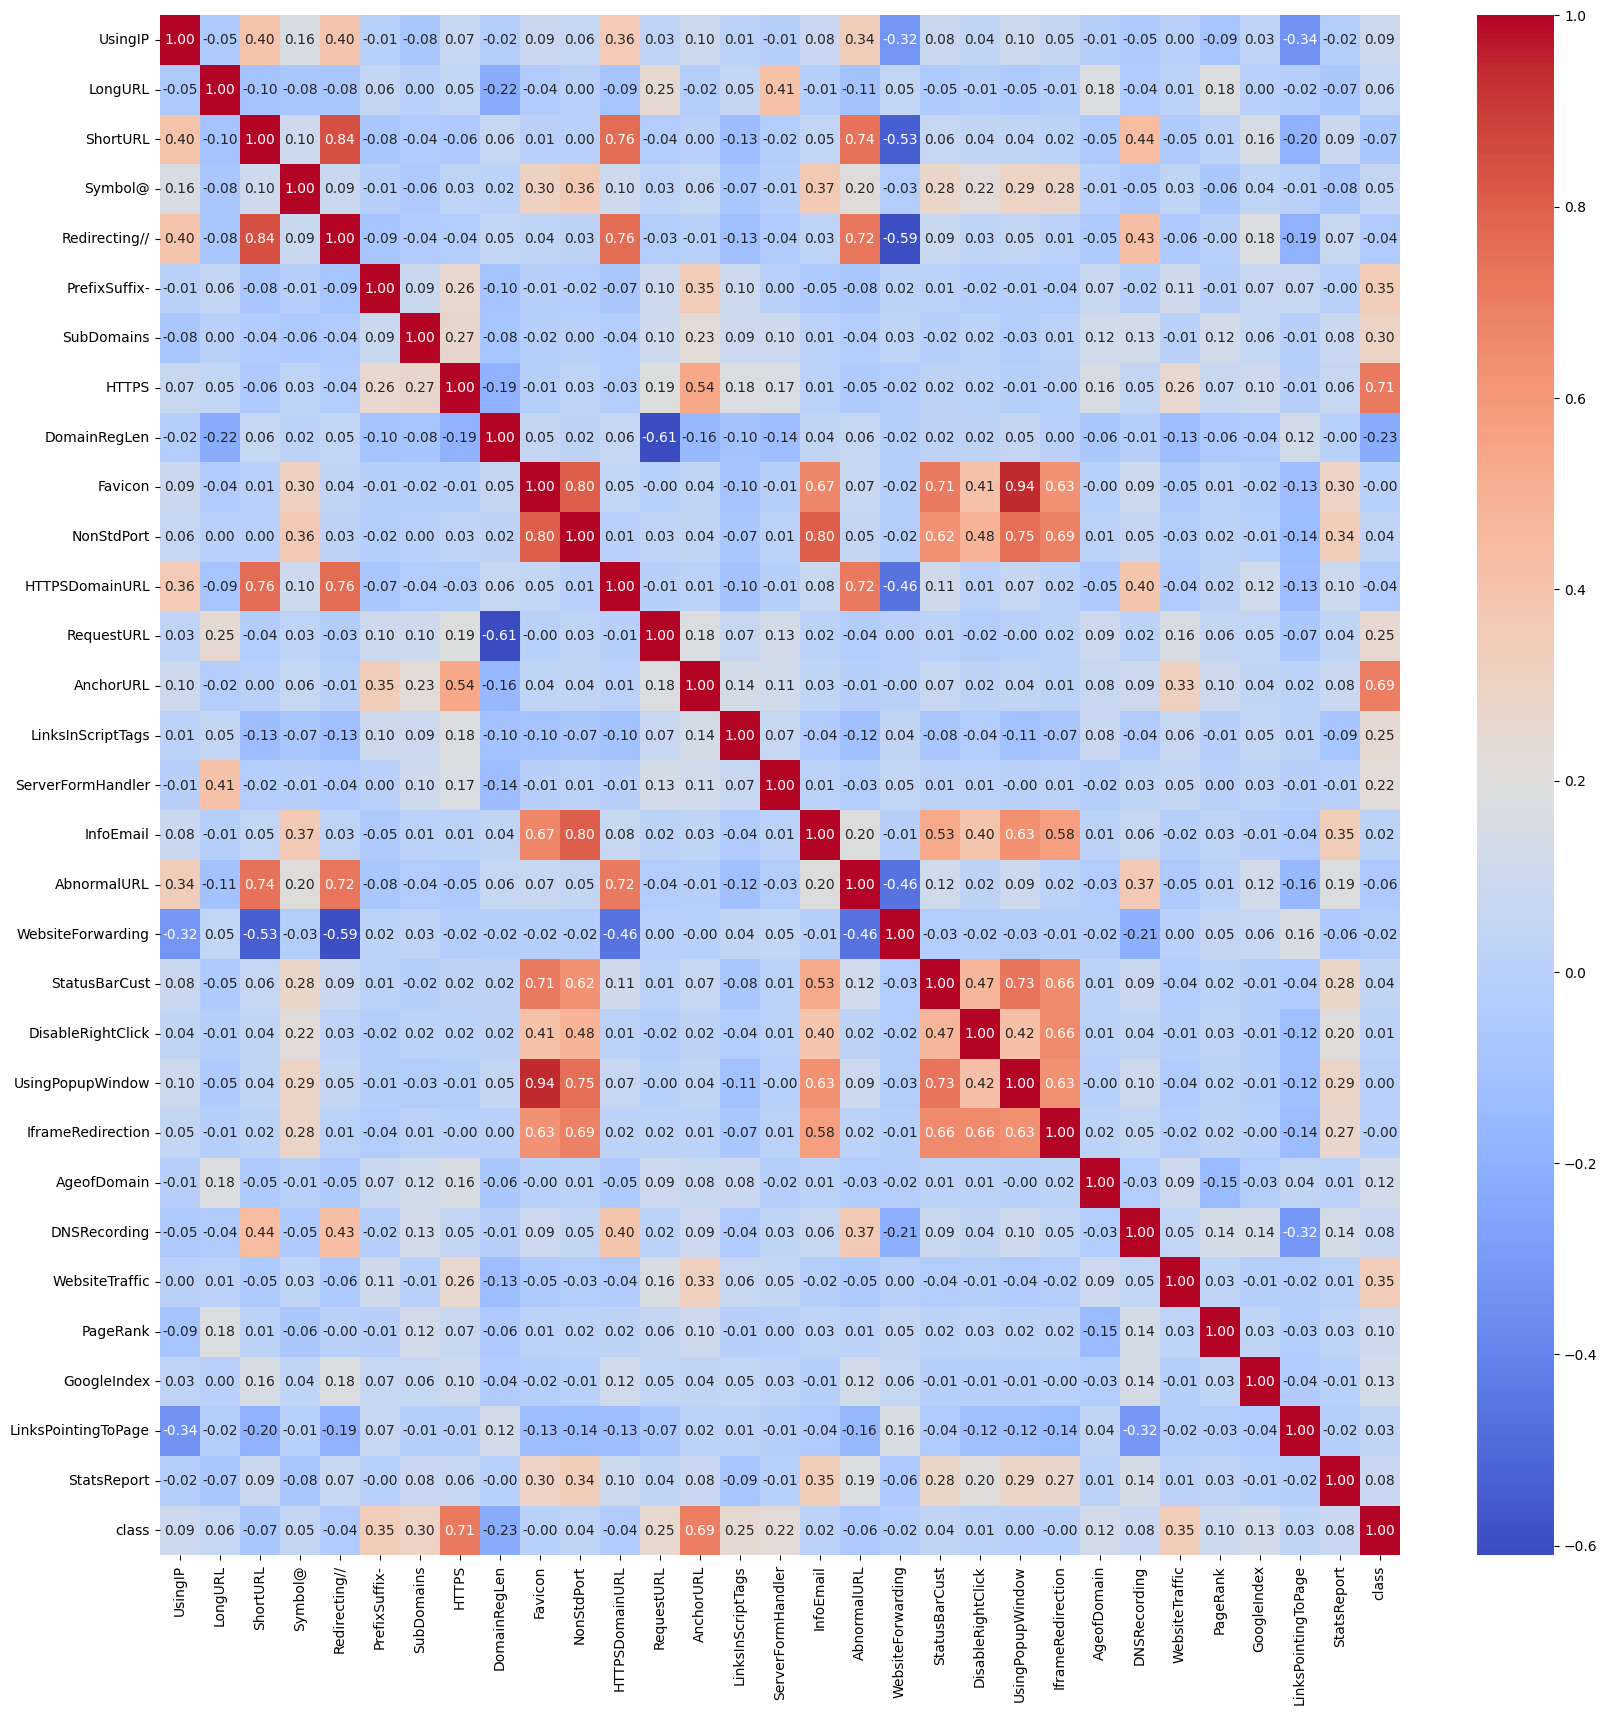

In [12]:
#show correlation
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


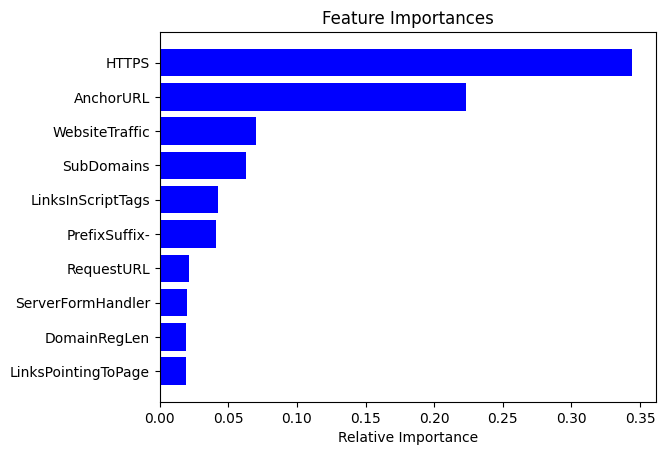

In [13]:
#show most important features
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [14]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X_val shape:', X_val.shape)


X_train shape: (7074, 30)
X_test shape: (2211, 30)
X_val shape: (1769, 30)


In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

In [16]:
print('Logistic Regression accuracy:', log_reg_accuracy)

Logistic Regression accuracy: 0.9326096788783356


In [17]:
#print trainig accuracy
log_reg_train_pred = log_reg.predict(X_train)
log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_pred)
print('Logistic Regression training accuracy:', log_reg_train_accuracy)


Logistic Regression training accuracy: 0.9281877297144473


In [18]:
#print validation accuracy
log_reg_val_pred = log_reg.predict(X_val)
log_reg_val_accuracy = accuracy_score(y_val, log_reg_val_pred)
print('Logistic Regression validation accuracy:', log_reg_val_accuracy)


Logistic Regression validation accuracy: 0.9253815715093273


In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#show f1 score
f1_score(y_test, log_reg_pred)


0.9404238304678129

In [20]:
#show precision
precision_score(y_test, log_reg_pred)

0.9289099526066351

In [21]:
#show recall
recall_score(y_test, log_reg_pred)

0.9522267206477733

In [22]:
#print classification report
print(classification_report(y_test, log_reg_pred))


              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [23]:
#show confusion matrix
confusion_matrix(y_test, log_reg_pred)


array([[ 886,   90],
       [  59, 1176]], dtype=int64)

In [ ]:
#train Advanced CatBoost model
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=10, loss_function='Logloss')
model.fit(X_train, y_train)
cat_pred = model.predict(X_test)
cat_accuracy = accuracy_score(y_test, cat_pred)

print('CatBoost accuracy:', cat_accuracy)



0:	learn: 0.5507192	total: 139ms	remaining: 1m 9s
1:	learn: 0.4353757	total: 155ms	remaining: 38.6s
2:	learn: 0.3517363	total: 163ms	remaining: 27s
3:	learn: 0.3047709	total: 177ms	remaining: 22s
4:	learn: 0.2639007	total: 180ms	remaining: 17.8s
5:	learn: 0.2324454	total: 193ms	remaining: 15.9s
6:	learn: 0.2097256	total: 207ms	remaining: 14.6s
7:	learn: 0.1920191	total: 222ms	remaining: 13.6s
8:	learn: 0.1792394	total: 237ms	remaining: 12.9s
9:	learn: 0.1650423	total: 254ms	remaining: 12.4s
10:	learn: 0.1559641	total: 270ms	remaining: 12s
11:	learn: 0.1482467	total: 287ms	remaining: 11.7s
12:	learn: 0.1413206	total: 302ms	remaining: 11.3s
13:	learn: 0.1353252	total: 318ms	remaining: 11s
14:	learn: 0.1298664	total: 332ms	remaining: 10.7s
15:	learn: 0.1235612	total: 349ms	remaining: 10.5s
16:	learn: 0.1182725	total: 363ms	remaining: 10.3s
17:	learn: 0.1148580	total: 378ms	remaining: 10.1s
18:	learn: 0.1107182	total: 392ms	remaining: 9.93s
19:	learn: 0.1069946	total: 407ms	remaining: 9.76

In [25]:
#show test accuracy
cat_train_pred = model.predict(X_train)
cat_train_accuracy = accuracy_score(y_train, cat_train_pred)
print('CatBoost training accuracy:', cat_train_accuracy)


CatBoost training accuracy: 0.991518235793045


In [26]:
#show validation accuracy
cat_val_pred = model.predict(X_val)
cat_val_accuracy = accuracy_score(y_val, cat_val_pred)
print('CatBoost validation accuracy:', cat_val_accuracy)


CatBoost validation accuracy: 0.9739966082532504


In [27]:
#show f1 score
f1_score(y_test, cat_pred)


0.9742765273311897

In [28]:
#show precision
precision_score(y_test, cat_pred)

0.9672785315243416

In [29]:
#show recall
recall_score(y_test, cat_pred)


0.9813765182186235

In [30]:
#print classification report
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [31]:
#show confusion matrix
confusion_matrix(y_test, cat_pred)

array([[ 935,   41],
       [  23, 1212]], dtype=int64)

In [32]:
#train Advanced CatBoost model
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=5000, learning_rate=0.1, depth=8, loss_function='Logloss')
model.fit(X_train, y_train)
cat1_pred = model.predict(X_test)
cat1_accuracy = accuracy_score(y_test, cat1_pred)

print('CatBoost accuracy:', cat1_accuracy)





0:	learn: 0.5507192	total: 2.03ms	remaining: 10.1s
1:	learn: 0.4297813	total: 7.29ms	remaining: 18.2s
2:	learn: 0.3492222	total: 16.9ms	remaining: 28.1s
3:	learn: 0.3038841	total: 21.8ms	remaining: 27.2s
4:	learn: 0.2676396	total: 46.3ms	remaining: 46.3s
5:	learn: 0.2432459	total: 51.5ms	remaining: 42.9s
6:	learn: 0.2214464	total: 62ms	remaining: 44.2s
7:	learn: 0.2087818	total: 67.1ms	remaining: 41.9s
8:	learn: 0.1914334	total: 72.8ms	remaining: 40.4s
9:	learn: 0.1825013	total: 78.2ms	remaining: 39s
10:	learn: 0.1718542	total: 83ms	remaining: 37.7s
11:	learn: 0.1622757	total: 88.3ms	remaining: 36.7s
12:	learn: 0.1565173	total: 108ms	remaining: 41.5s
13:	learn: 0.1502223	total: 113ms	remaining: 40.2s
14:	learn: 0.1443604	total: 118ms	remaining: 39.1s
15:	learn: 0.1423741	total: 137ms	remaining: 42.6s
16:	learn: 0.1372773	total: 155ms	remaining: 45.5s
17:	learn: 0.1337945	total: 160ms	remaining: 44.3s
18:	learn: 0.1299366	total: 165ms	remaining: 43.4s
19:	learn: 0.1263748	total: 185ms	r

In [33]:
#show test accuracy
cat1_train_pred = model.predict(X_train)
cat1_train_accuracy = accuracy_score(y_train, cat1_train_pred)
print('CatBoost training accuracy:', cat1_train_accuracy)


CatBoost training accuracy: 0.991518235793045


In [34]:
#show validation accuracy
cat1_val_pred = model.predict(X_val)
cat1_val_accuracy = accuracy_score(y_val, cat1_val_pred)
print('CatBoost validation accuracy:', cat1_val_accuracy)



CatBoost validation accuracy: 0.9756924816280385


In [35]:
#show f1 score
f1_score(y_test, cat1_pred)


0.9746886299718762

In [36]:
#show precision
precision_score(y_test, cat1_pred)

0.967304625199362

In [37]:
#show recall
recall_score(y_test, cat1_pred)

0.9821862348178138

In [38]:
#print classification report
print(classification_report(y_test, cat1_pred))


              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [39]:
#show confusion matrix
confusion_matrix(y_test, cat1_pred)


array([[ 935,   41],
       [  22, 1213]], dtype=int64)

In [40]:
#train lightgbm model
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
lgb_pred = model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_pred)

print('LightGBM accuracy:', lgb_accuracy)


[LightGBM] [Info] Number of positive: 3963, number of negative: 3111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 7074, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560221 -> initscore=0.242057
[LightGBM] [Info] Start training from score 0.242057
LightGBM accuracy: 0.966078697421981


In [41]:
#show test accuracy
lgb_train_pred = model.predict(X_train)
lgb_train_accuracy = accuracy_score(y_train, lgb_train_pred)
print('LightGBM training accuracy:', lgb_train_accuracy)


LightGBM training accuracy: 0.9814814814814815


In [42]:
#show validation accuracy
lgb_val_pred = model.predict(X_val)
lgb_val_accuracy = accuracy_score(y_val, lgb_val_pred)
print('LightGBM validation accuracy:', lgb_val_accuracy)


LightGBM validation accuracy: 0.971735443753533


In [43]:
#show f1 score
f1_score(y_test, lgb_pred)


0.9697458652682533

In [44]:
#show precision
precision_score(y_test, lgb_pred)


0.9662379421221865

In [45]:
#show recall
recall_score(y_test, lgb_pred)


0.9732793522267207

In [46]:
#print classification report
print(classification_report(y_test, lgb_pred))


              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [47]:
#show confusion matrix
confusion_matrix(y_test, lgb_pred)


array([[ 934,   42],
       [  33, 1202]], dtype=int64)

In [48]:
model = lgb.LGBMClassifier(max_depth=10, learning_rate=0.1, n_estimators=200)   
model.fit(X_train, y_train)
lgb1_pred = model.predict(X_test)
lgb1_accuracy = accuracy_score(y_test, lgb1_pred)

print('LightGBM accuracy:', lgb1_accuracy)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3963, number of negative: 3111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 7074, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560221 -> initscore=0.242057
[LightGBM] [Info] Start training from score 0.242057
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LightGBM accuracy: 0.968340117593849


In [49]:
#show test accuracy
lgb1_train_pred = model.predict(X_train)
lgb1_train_accuracy = accuracy_score(y_train, lgb1_train_pred)

print('LightGBM training accuracy:', lgb1_train_accuracy)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LightGBM training accuracy: 0.9903873338987843


In [50]:
#show validation accuracy
lgb1_val_pred = model.predict(X_val)
lgb1_val_accuracy = accuracy_score(y_val, lgb1_val_pred)
print('LightGBM validation accuracy:', lgb1_val_accuracy)   


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LightGBM validation accuracy: 0.9739966082532504


In [51]:
#show f1 score
f1_score(y_test, lgb1_pred)


0.9718649517684887

In [52]:
#show precision
precision_score(y_test, lgb1_pred)


0.9648842777334398

In [53]:
#show recall
recall_score(y_test, lgb1_pred)


0.9789473684210527

In [54]:
#print classification report
print(classification_report(y_test, lgb1_pred))


              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [55]:
#show confusion matrix
confusion_matrix(y_test, lgb1_pred)


array([[ 932,   44],
       [  26, 1209]], dtype=int64)

In [57]:
#improve accuracy with GridSearchCV

from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.05, 0.1]}
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=3)
grid.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)
#use AdaBoost with best parameter
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)
model.fit(X_train, y_train)
ada_pred = model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print('AdaBoost accuracy:', ada_accuracy)


 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

 The best score across ALL searched params:
 0.9281877297144474

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'n_estimators': 200}
AdaBoost accuracy: 0.9326096788783356


In [58]:
#show test accuracy
ada_train_pred = model.predict(X_train)
ada_train_accuracy = accuracy_score(y_train, ada_train_pred)
print('AdaBoost training accuracy:', ada_train_accuracy)


AdaBoost training accuracy: 0.9297427198190557


In [59]:
#show validation accuracy
ada_val_pred = model.predict(X_val)
ada_val_accuracy = accuracy_score(y_val, ada_val_pred)
print('AdaBoost validation accuracy:', ada_val_accuracy)



AdaBoost validation accuracy: 0.933295647258338


In [60]:
#show f1 score
f1_score(y_test, ada_pred)


0.9405664140406862

In [61]:
#show precision
precision_score(y_test, ada_pred)


0.9268867924528302

In [62]:
#show recall
recall_score(y_test, ada_pred)

0.9546558704453442

In [63]:
#print classification report
print(classification_report(y_test, ada_pred))


              precision    recall  f1-score   support

          -1       0.94      0.90      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [64]:
#show confusion matrix
confusion_matrix(y_test, ada_pred)

array([[ 883,   93],
       [  56, 1179]], dtype=int64)

In [65]:
#use hiraachical boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
gb_pred = model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('Gradient Boosting accuracy:', gb_accuracy)


Gradient Boosting accuracy: 0.9520578923563998


In [66]:
#show test accuracy
gb_train_pred = model.predict(X_train)
gb_train_accuracy = accuracy_score(y_train, gb_train_pred)
print('Gradient Boosting training accuracy:', gb_train_accuracy)


Gradient Boosting training accuracy: 0.9515125812835736


In [67]:
#show validation accuracy
gb_val_pred = model.predict(X_val)
gb_val_accuracy = accuracy_score(y_val, gb_val_pred)
print('Gradient Boosting validation accuracy:', gb_val_accuracy)


Gradient Boosting validation accuracy: 0.9462973431317129


In [68]:
#show f1 score
f1_score(y_test, gb_pred)


0.9573954983922829

In [69]:
#show precision
precision_score(y_test, gb_pred)


0.9505187549880287

In [70]:
#show recall
recall_score(y_test, gb_pred)


0.9643724696356275

In [71]:
#print classification report
print(classification_report(y_test, gb_pred))


              precision    recall  f1-score   support

          -1       0.95      0.94      0.95       976
           1       0.95      0.96      0.96      1235

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [72]:
#show confusion matrix
confusion_matrix(y_test, gb_pred)


array([[ 914,   62],
       [  44, 1191]], dtype=int64)

In [73]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd

In [74]:
cat_model = CatBoostClassifier(silent=True)

# Define parameter grid for Random Search
param_dist = {
    'iterations': np.arange(100, 500, 50),
    'depth': np.arange(4, 10),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'l2_leaf_reg': np.logspace(-1, 1, 5),
    'random_strength': np.linspace(0, 10, 5),
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    scoring='accuracy',
    n_iter=50,  # Number of different combinations to try
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [75]:
print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')


Best parameters: {'random_strength': 7.5, 'learning_rate': 0.052222222222222225, 'l2_leaf_reg': 1.0, 'iterations': 350, 'depth': 9}
Best score: 0.9673452078032231


In [76]:

# Train the model with the best parameters
best_cat_model = CatBoostClassifier(**best_params)
best_cat_model.fit(X_train, y_train)

# Predict the target
best_cat_pred = best_cat_model.predict(X_test)

# Calculate the accuracy
best_cat_accuracy = accuracy_score(y_test, best_cat_pred)

print(f'Best CatBoost accuracy: {best_cat_accuracy}')



0:	learn: 0.6080354	total: 26.3ms	remaining: 9.19s
1:	learn: 0.5712947	total: 41.9ms	remaining: 7.29s
2:	learn: 0.5062976	total: 79.4ms	remaining: 9.19s
3:	learn: 0.4794966	total: 89ms	remaining: 7.7s
4:	learn: 0.4502726	total: 95ms	remaining: 6.55s
5:	learn: 0.3959985	total: 109ms	remaining: 6.28s
6:	learn: 0.3631496	total: 112ms	remaining: 5.51s
7:	learn: 0.3296692	total: 120ms	remaining: 5.13s
8:	learn: 0.3086751	total: 130ms	remaining: 4.93s
9:	learn: 0.2991959	total: 133ms	remaining: 4.53s
10:	learn: 0.2816474	total: 141ms	remaining: 4.36s
11:	learn: 0.2625372	total: 154ms	remaining: 4.35s
12:	learn: 0.2480351	total: 186ms	remaining: 4.82s
13:	learn: 0.2330625	total: 197ms	remaining: 4.73s
14:	learn: 0.2281449	total: 209ms	remaining: 4.67s
15:	learn: 0.2199503	total: 215ms	remaining: 4.5s
16:	learn: 0.2109296	total: 232ms	remaining: 4.55s
17:	learn: 0.2005899	total: 247ms	remaining: 4.55s
18:	learn: 0.1922026	total: 262ms	remaining: 4.56s
19:	learn: 0.1879196	total: 271ms	remainin

In [77]:
#show test accuracy
best_cat_train_pred = best_cat_model.predict(X_train)
best_cat_train_accuracy = accuracy_score(y_train, best_cat_train_pred)
print('Best CatBoost training accuracy:', best_cat_train_accuracy)


Best CatBoost training accuracy: 0.9912355103194798


In [78]:
#show validation accuracy
best_cat_val_pred = best_cat_model.predict(X_val)
best_cat_val_accuracy = accuracy_score(y_val, best_cat_val_pred)
print('Best CatBoost validation accuracy:', best_cat_val_accuracy)


Best CatBoost validation accuracy: 0.9768230638778971


In [79]:
#show f1 score
f1_score(y_test, best_cat_pred)


0.9734939759036145

In [80]:
#show precision
precision_score(y_test, best_cat_pred)


0.9657370517928286

In [81]:
#show recall
recall_score(y_test, best_cat_pred)


0.9813765182186235

In [82]:
#print classification report
print(classification_report(y_test, best_cat_pred))


              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [83]:
#show confusion matrix
confusion_matrix(y_test, best_cat_pred)


array([[ 933,   43],
       [  23, 1212]], dtype=int64)

In [84]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth= 5, loss_function='Logloss')
model.fit(X_train, y_train)
cat_adv_pred = model.predict(X_test)
cat_adv_accuracy = accuracy_score(y_test, cat_adv_pred)

print('CatBoost accuracy:', cat_adv_accuracy)



0:	learn: 0.5507192	total: 48.7ms	remaining: 24.3s
1:	learn: 0.4393881	total: 63.5ms	remaining: 15.8s
2:	learn: 0.3587968	total: 80.2ms	remaining: 13.3s
3:	learn: 0.3095383	total: 96.4ms	remaining: 12s
4:	learn: 0.2723046	total: 111ms	remaining: 11s
5:	learn: 0.2526426	total: 126ms	remaining: 10.4s
6:	learn: 0.2345397	total: 130ms	remaining: 9.15s
7:	learn: 0.2216686	total: 133ms	remaining: 8.18s
8:	learn: 0.2094095	total: 136ms	remaining: 7.43s
9:	learn: 0.2009723	total: 139ms	remaining: 6.83s
10:	learn: 0.1953364	total: 143ms	remaining: 6.35s
11:	learn: 0.1879674	total: 156ms	remaining: 6.33s
12:	learn: 0.1821041	total: 159ms	remaining: 5.97s
13:	learn: 0.1787744	total: 170ms	remaining: 5.89s
14:	learn: 0.1754609	total: 173ms	remaining: 5.59s
15:	learn: 0.1721366	total: 176ms	remaining: 5.34s
16:	learn: 0.1691724	total: 185ms	remaining: 5.26s
17:	learn: 0.1653433	total: 189ms	remaining: 5.07s
18:	learn: 0.1625393	total: 193ms	remaining: 4.89s
19:	learn: 0.1605507	total: 197ms	remaini

In [85]:
#show test accuracy
cat_adv_train_pred = model.predict(X_train)
cat_adv_train_accuracy = accuracy_score(y_train, cat_adv_train_pred)
print('CatBoost training accuracy:', cat_adv_train_accuracy)


CatBoost training accuracy: 0.9877014418999152


In [86]:
#show validation accuracy
cat_adv_val_pred = model.predict(X_val)
cat_adv_val_accuracy = accuracy_score(y_val, cat_adv_val_pred)
print('CatBoost validation accuracy:', cat_adv_val_accuracy)


CatBoost validation accuracy: 0.9739966082532504


In [87]:
#show f1 score
f1_score(y_test, cat_adv_pred)


0.9759229534510433

In [88]:
#show precision
precision_score(y_test, cat_adv_pred)

0.9673826571201273

In [89]:
#show recall
recall_score(y_test, cat_adv_pred)

0.9846153846153847

In [90]:
#print classification report
print(classification_report(y_test, cat_adv_pred))


              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [91]:
#show confusion matrix
confusion_matrix(y_test, cat_adv_pred)


array([[ 935,   41],
       [  19, 1216]], dtype=int64)

In [92]:
#SAVE CatBoost model as sav file 
model.save_model('catboost_model_improved.sav')


In [93]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth= 5, loss_function='Logloss')
model.fit(X_train, y_train)
cat_adv2_pred = model.predict(X_test)
cat_adv2_accuracy = accuracy_score(y_test, cat_adv2_pred)

print('CatBoost accuracy:', cat_adv2_accuracy)

0:	learn: 0.5507192	total: 11.4ms	remaining: 11.4s
1:	learn: 0.4393881	total: 16.5ms	remaining: 8.22s
2:	learn: 0.3587968	total: 42.3ms	remaining: 14.1s
3:	learn: 0.3095383	total: 45.4ms	remaining: 11.3s
4:	learn: 0.2723046	total: 48.4ms	remaining: 9.63s
5:	learn: 0.2526426	total: 52.3ms	remaining: 8.66s
6:	learn: 0.2345397	total: 72.9ms	remaining: 10.3s
7:	learn: 0.2216686	total: 88.4ms	remaining: 11s
8:	learn: 0.2094095	total: 91.5ms	remaining: 10.1s
9:	learn: 0.2009723	total: 94.8ms	remaining: 9.38s
10:	learn: 0.1953364	total: 97.8ms	remaining: 8.8s
11:	learn: 0.1879674	total: 102ms	remaining: 8.38s
12:	learn: 0.1821041	total: 119ms	remaining: 9.05s
13:	learn: 0.1787744	total: 134ms	remaining: 9.45s
14:	learn: 0.1754609	total: 150ms	remaining: 9.85s
15:	learn: 0.1721366	total: 165ms	remaining: 10.2s
16:	learn: 0.1691724	total: 169ms	remaining: 9.77s
17:	learn: 0.1653433	total: 172ms	remaining: 9.41s
18:	learn: 0.1625393	total: 176ms	remaining: 9.07s
19:	learn: 0.1605507	total: 179ms

In [94]:
#show test accuracy
cat_adv2_train_pred = model.predict(X_train)
cat_adv2_train_accuracy = accuracy_score(y_train, cat_adv2_train_pred)
print('CatBoost training accuracy:', cat_adv2_train_accuracy)


CatBoost training accuracy: 0.9906700593723494


In [95]:
#show validation accuracy
cat_adv2_val_pred = model.predict(X_val)
cat_adv2_val_accuracy = accuracy_score(y_val, cat_adv2_val_pred)
print('CatBoost validation accuracy:', cat_adv2_val_accuracy)


CatBoost validation accuracy: 0.9768230638778971


In [96]:
#show f1 score
f1_score(y_test, cat_adv2_pred)


0.9759615384615384

In [97]:
#show precision
precision_score(y_test, cat_adv2_pred)


0.9659000793021412

In [98]:
#show recall
recall_score(y_test, cat_adv2_pred)

0.9862348178137652

In [99]:
#print classification report
print(classification_report(y_test, cat_adv2_pred))


              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [100]:
#show confusion matrix
confusion_matrix(y_test, cat_adv2_pred)


array([[ 933,   43],
       [  17, 1218]], dtype=int64)

In [101]:
#SAVE CatBoost model as sav file
model.save_model('catboost_model_improved_17.sav')



In [ ]:
#make a table of train, test and validation accuracy of all models
accuracy = [log_reg_accuracy, cat_accuracy, lgb_accuracy, ada_accuracy, gb_accuracy, best_cat_accuracy, cat_adv_accuracy, cat_adv2_accuracy]
train_accuracy = [log_reg_train_accuracy, cat_train_accuracy, lgb_train_accuracy, ada_train_accuracy, gb_train_accuracy, best_cat_train_accuracy, cat_adv_train_accuracy, cat_adv2_train_accuracy]
val_accuracy = [log_reg_val_accuracy, cat_val_accuracy, lgb_val_accuracy, ada_val_accuracy, gb_val_accuracy, best_cat_val_accuracy, cat_adv_val_accuracy, cat_adv2_val_accuracy]
models = ['Logistic Regression', 'CatBoost', 'LightGBM', 'AdaBoost', 'Gradient Boosting', 'CatBoost', 'CatBoost Improved', 'CatBoost Improved 2']
accuracy_df = pd.DataFrame({'Model': models, 'Train Accuracy': train_accuracy, 'Test Accuracy': accuracy, 'Validation Accuracy': val_accuracy})
accuracy_df




,Model,Train Accuracy,Test Accuracy,Validation Accuracy
0,Logistic Regression,0.928188,0.932610,0.925382
1,CatBoost,0.991518,0.971054,0.973997
2,LightGBM,0.981481,0.966079,0.971735
3,AdaBoost,0.929743,0.932610,0.933296
4,Gradient Boosting,0.951513,0.952058,0.946297
5,Best CatBoost,0.991236,0.970149,0.976823
6,CatBoost Improved,0.987701,0.972863,0.973997
7,CatBoost Improved 2,0.990670,0.972863,0.976823


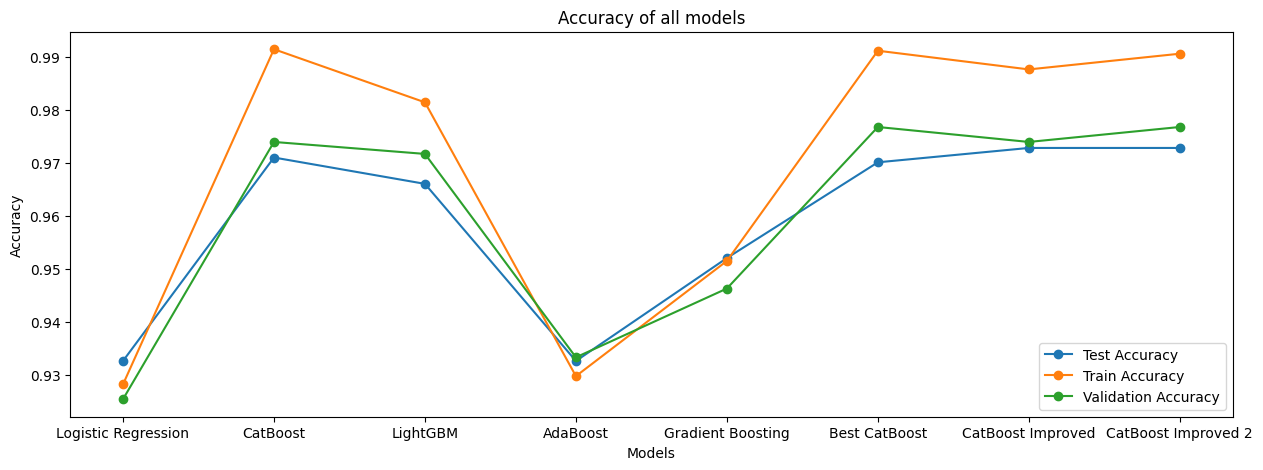

In [106]:
#plot the accuracy of all models
plt.figure(figsize=(15, 5))
plt.plot(models, accuracy, marker='o', label='Test Accuracy')
plt.plot(models, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(models, val_accuracy, marker='o', label='Validation Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of all models')
plt.legend()
plt.show()


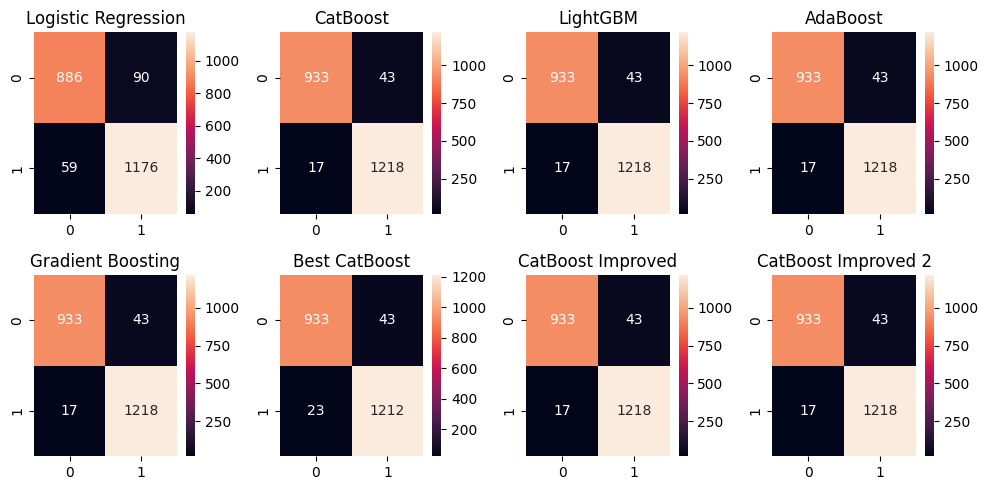

In [110]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
axes = axes.ravel()
for i, model in enumerate([ log_reg, model, model, model, model, best_cat_model, model, model]):
    model_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, model_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(models[i])
plt.tight_layout()
plt.show()



In [109]:
#show table of f1 score, precision and recall of all models
f1 = [f1_score(y_test, log_reg_pred), f1_score(y_test, cat_pred), f1_score(y_test, lgb_pred), f1_score(y_test, ada_pred), f1_score(y_test, gb_pred), f1_score(y_test, best_cat_pred), f1_score(y_test, cat_adv_pred), f1_score(y_test, cat_adv2_pred)]
precision = [precision_score(y_test, log_reg_pred), precision_score(y_test, cat_pred), precision_score(y_test, lgb_pred), precision_score(y_test, ada_pred), precision_score(y_test, gb_pred), precision_score(y_test, best_cat_pred), precision_score(y_test, cat_adv_pred), precision_score(y_test, cat_adv2_pred)]
recall = [recall_score(y_test, log_reg_pred), recall_score(y_test, cat_pred), recall_score(y_test, lgb_pred), recall_score(y_test, ada_pred), recall_score(y_test, gb_pred), recall_score(y_test, best_cat_pred), recall_score(y_test, cat_adv_pred), recall_score(y_test, cat_adv2_pred)]
models = ['Logistic Regression', 'CatBoost', 'LightGBM', 'AdaBoost', 'Gradient Boosting', 'Best CatBoost', 'CatBoost Improved', 'CatBoost Improved 2']
metrics_df = pd.DataFrame({'Model': models, 'F1 Score': f1, 'Precision': precision, 'Recall': recall})
metrics_df


,Model,F1 Score,Precision,Recall
0,Logistic Regression,0.940424,0.928910,0.952227
1,CatBoost,0.974277,0.967279,0.981377
2,LightGBM,0.969746,0.966238,0.973279
3,AdaBoost,0.940566,0.926887,0.954656
4,Gradient Boosting,0.957395,0.950519,0.964372
5,Best CatBoost,0.973494,0.965737,0.981377
6,CatBoost Improved,0.975923,0.967383,0.984615
7,CatBoost Improved 2,0.975962,0.965900,0.986235
